# Create a file to monitor your wallet balance 
## Then using that data to create plot.
The `wallet` executable created will append data in a json format to file > wallet.balance

## Creating the bash `wallet` executable:
This file will build the data resource > wallet.balance  <br /> <br />
Do not forget to make this file executable: chmod +x wallet <br />
If you cp or sym-link wallet to `/usr/bin` it can be used in a cron job <br />
( on my computer a file in `/usr/local/bin` will not be executed in a cron job )

In [ ]:
%%writefile wallet
#!/bin/bash
# do not forget to make this file executable: chmod +x wallet
# if you cp or symlink wallet to /usr/bin it can be used in a cron job
#echo curly brackets and the date into the datafile > wallet.balance
echo "{ \"Date\": `date +%s`," >>/home/jack/wallet.balance
# sent the results of the command: lbrynet wallet balance into the file > wallet.balance
lbrynet wallet balance >>/home/jack/wallet.balance 
# echo and ending curly-brackets to  > wallet.balance
echo "}" >>/home/jack/wallet.balance
# Then look at > wallet.balance
cat /home/jack/wallet.balance

The results of the above file being executed will append the wallet.balance in the following format: <br /> <br />
`{ "Date": 1579732895,
{
  "available": "0.1950495",
  "reserved": "14335.468",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6211.0",
    "tips": "7214.31"
  },
  "total": "14335.6630495"
}
}`    

## The result of the `wallet` being executed 

In [43]:
# The result of the `wallet` being executed 
# Each time it is run it will append the wallet.balance file
# This may be set up torun as a cron job
!wallet

{
  "available": "703.7053835",
  "reserved": "9564.503",
  "reserved_subtotals": {
    "claims": "457.503",
    "supports": "4318.0",
    "tips": "4789.0"
  },
  "total": "10268.2083835"
}
{
  "available": "703.7053835",
  "reserved": "9616.503",
  "reserved_subtotals": {
    "claims": "457.503",
    "supports": "4318.0",
    "tips": "4841.0"
  },
  "total": "10320.2083835"
}
{
  "available": "704.7053835",
  "reserved": "9616.503",
  "reserved_subtotals": {
    "claims": "457.503",
    "supports": "4318.0",
    "tips": "4841.0"
  },
  "total": "10321.2083835"
}
{
  "available": "704.7053835",
  "reserved": "9618.503",
  "reserved_subtotals": {
    "claims": "457.503",
    "supports": "4318.0",
    "tips": "4843.0"
  },
  "total": "10323.2083835"
}
{
  "available": "724.7053835",
  "reserved": "9618.503",
  "reserved_subtotals": {
    "claims": "457.503",
    "supports": "4318.0",
    "tips": "4843.0"
  },
  "total": "10343.2083835"
}
{
  "available": "723.7052425",
  "reserved": "978

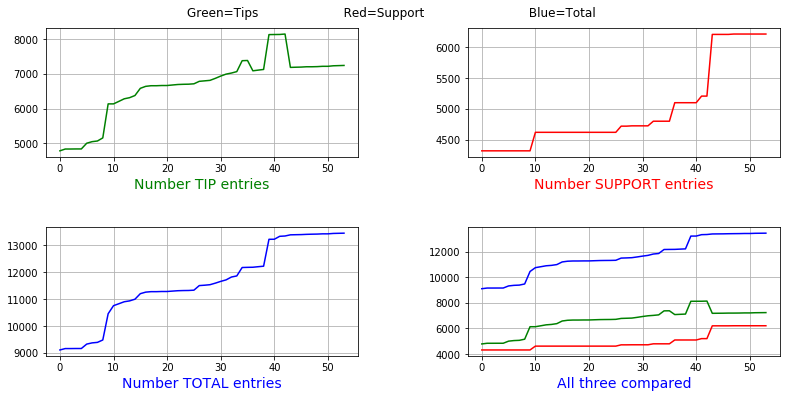

In [44]:
f = open("/home/jack/wallet.balance").readlines()
x = []
y = []
for line in f:
    if '"supports": "' in line:
        line =line.replace('"\n', '')
        line =line.replace('"supports": "', '')
        line =line.replace('",', '')
        num = float(line)
        x.append(int(num))
        
for lines in f:
    if '"tips": "' in lines:
        lines =lines.replace('"\n', '')
        lines =lines.replace('"tips": "', '')
        lines =lines.replace('",', '')
        nums = float(lines)
        y.append(int(nums))
        
t=range(0,len(x))  
S = np.array(x)
s = np.array(y)

plt.figure(figsize=(12, 5))
#fig, ax = plt.subplots()
plt.subplot(221)
plt.grid(True)
#ax.plot(t, s, color='green')
plt.plot(t, s, color='green')
plt.xlabel('Number TIP entries', fontsize=14, color='green')
plt.subplot(222)
plt.grid(True)
#ax.plot(t, S, color='red')
plt.plot(t, S, color='red')
plt.xlabel('Number SUPPORT entries', fontsize=14, color='red')
plt.subplot(223)
plt.grid(True)
plt.plot(t, S+s, color='blue')
plt.xlabel('Number TOTAL entries', fontsize=14, color='blue')
#ax.plot(t, S+s, color='blue')
plt.subplot(224)
plt.grid(True)
plt.plot(t, s, color='green')
plt.plot(t, S+s, color='blue')
plt.plot(t, S, color='red')
plt.suptitle('Green=Tips                      Red=Support                           Blue=Total')
plt.xlabel('All three compared', fontsize=14, color='blue')

plt.subplots_adjust(top=0.92, bottom=0.01, left=0.10, right=0.95, hspace=0.55,
                    wspace=0.35)

plt.show()


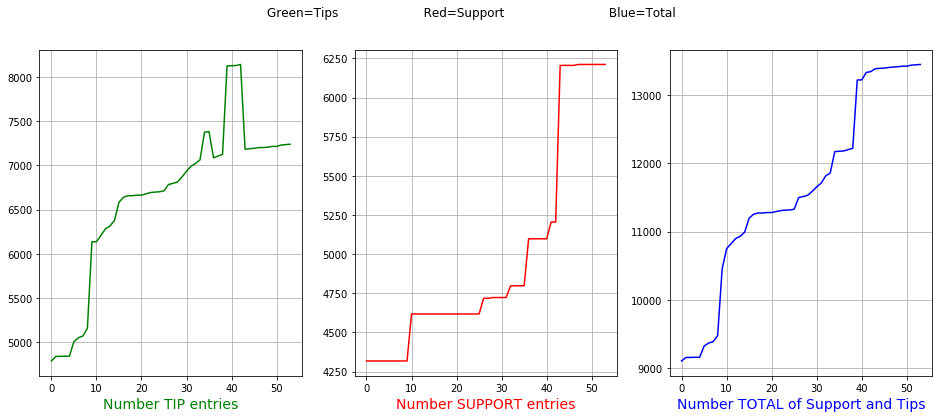

In [45]:
f = open("/home/jack/wallet.balance").readlines()
x = []
y = []
for line in f:
    if '"supports": "' in line:
        line =line.replace('"\n', '')
        line =line.replace('"supports": "', '')
        line =line.replace('",', '')
        num = float(line)
        x.append(int(num))
        
for lines in f:
    if '"tips": "' in lines:
        lines =lines.replace('"\n', '')
        lines =lines.replace('"tips": "', '')
        lines =lines.replace('",', '')
        nums = float(lines)
        y.append(int(nums))
        
t=range(0,len(x))  
S = np.array(x)
s = np.array(y)
plt.figure(figsize=(16, 6))
#fig, ax = plt.subplots()
plt.subplot(131)
plt.grid(True)
#ax.plot(t, s, color='green')
plt.plot(t, s, color='green')
plt.xlabel('Number TIP entries', fontsize=14, color='green')
plt.subplot(132)
plt.grid(True)
#ax.plot(t, S, color='red')
plt.plot(t, S, color='red')
plt.xlabel('Number SUPPORT entries', fontsize=14, color='red')
plt.subplot(133)
plt.grid(True)
plt.plot(t, S+s, color='blue')
#ax.plot(t, S+s, color='blue')
plt.suptitle('Green=Tips                      Red=Support                           Blue=Total')
plt.xlabel('Number TOTAL of Support and Tips', fontsize=14, color='blue')
plt.ylabel='Values (LBC)'
#ax.set(xlabel='time (t)', ylabel='Values (LBC)',
#       title='Blue=Total / Green=Tips / Red=Support')
#plt.subplot(231)(t, S, color='red')
plt.show()


## Notice the change in the green and the red
Notice the change (drop) in the green (Tips) and the increase in the red (Supports) <br />
I moved some tips to support 

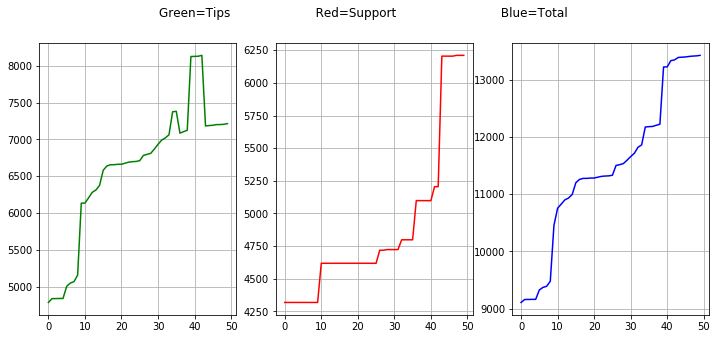

In [246]:
f = open("/home/jack/wallet.balance").readlines()
x = []
y = []
for line in f:
    if '"supports": "' in line:
        line =line.replace('"\n', '')
        line =line.replace('"supports": "', '')
        line =line.replace('",', '')
        num = float(line)
        x.append(int(num))
        
for lines in f:
    if '"tips": "' in lines:
        lines =lines.replace('"\n', '')
        lines =lines.replace('"tips": "', '')
        lines =lines.replace('",', '')
        nums = float(lines)
        y.append(int(nums))
        
t=range(0,len(x))  
S = np.array(x)
s = np.array(y)
plt.figure(figsize=(12, 5))
#fig, ax = plt.subplots()
plt.subplot(131)
plt.grid(True)
#ax.plot(t, s, color='green')
plt.plot(t, s, color='green')
plt.subplot(132)
plt.grid(True)
#ax.plot(t, S, color='red')
plt.plot(t, S, color='red')
plt.subplot(133)
plt.grid(True)
plt.plot(t, S+s, color='blue')
#ax.plot(t, S+s, color='blue')
plt.suptitle('Green=Tips                      Red=Support                           Blue=Total')
ax.set(xlabel='time (t)', ylabel='Values (LBC)',
       title='Blue=Total / Green=Tips / Red=Support')
plt.show()


# This data is new and is being run in a cron job

In [ ]:
# %load /home/jack/wallet2.balance
{ "Date": 1579654802,
{
  "available": "6.395654",
  "reserved": "14303.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6205.0",
    "tips": "7188.11"
  },
  "total": "14309.663654"
}
}
{ "Date": 1579658401,
{
  "available": "6.395654",
  "reserved": "14303.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6205.0",
    "tips": "7188.11"
  },
  "total": "14309.663654"
}
}
{ "Date": 1579662001,
{
  "available": "6.395654",
  "reserved": "14303.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6205.0",
    "tips": "7188.11"
  },
  "total": "14309.663654"
}
}
{ "Date": 1579665601,
{
  "available": "6.395654",
  "reserved": "14303.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6205.0",
    "tips": "7188.11"
  },
  "total": "14309.663654"
}
}
{ "Date": 1579669201,
{
  "available": "6.395654",
  "reserved": "14307.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6205.0",
    "tips": "7192.11"
  },
  "total": "14313.663654"
}
}
{ "Date": 1579672801,
{
  "available": "6.395654",
  "reserved": "14307.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6205.0",
    "tips": "7192.11"
  },
  "total": "14313.663654"
}
}
{ "Date": 1579676401,
{
  "available": "6.395654",
  "reserved": "14307.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6205.0",
    "tips": "7192.11"
  },
  "total": "14313.663654"
}
}
{ "Date": 1579680001,
{
  "available": "6.395654",
  "reserved": "14309.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6205.0",
    "tips": "7194.11"
  },
  "total": "14315.663654"
}
}
{ "Date": 1579683601,
{
  "available": "6.395654",
  "reserved": "14309.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6205.0",
    "tips": "7194.11"
  },
  "total": "14315.663654"
}
}
{ "Date": 1579687201,
{
  "available": "6.395654",
  "reserved": "14309.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6205.0",
    "tips": "7194.11"
  },
  "total": "14315.663654"
}
}
{ "Date": 1579690801,
{
  "available": "6.395654",
  "reserved": "14312.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6205.0",
    "tips": "7197.11"
  },
  "total": "14318.663654"
}
}
{ "Date": 1579694401,
{
  "available": "6.395654",
  "reserved": "14312.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6205.0",
    "tips": "7197.11"
  },
  "total": "14318.663654"
}
}
{ "Date": 1579698001,
{
  "available": "6.395654",
  "reserved": "14312.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6205.0",
    "tips": "7197.11"
  },
  "total": "14318.663654"
}
}
{ "Date": 1579701601,
{
  "available": "6.395654",
  "reserved": "14316.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6205.0",
    "tips": "7201.11"
  },
  "total": "14322.663654"
}
}
{ "Date": 1579705201,
{
  "available": "6.395654",
  "reserved": "14316.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6205.0",
    "tips": "7201.11"
  },
  "total": "14322.663654"
}
}
{ "Date": 1579708801,
{
  "available": "0.395341",
  "reserved": "14322.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6211.0",
    "tips": "7201.11"
  },
  "total": "14322.663341"
}
}
{ "Date": 1579712401,
{
  "available": "0.395341",
  "reserved": "14325.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6211.0",
    "tips": "7204.11"
  },
  "total": "14325.663341"
}
}
{ "Date": 1579716001,
{
  "available": "0.395341",
  "reserved": "14325.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6211.0",
    "tips": "7204.11"
  },
  "total": "14325.663341"
}
}
{ "Date": 1579719601,
{
  "available": "0.395341",
  "reserved": "14325.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6211.0",
    "tips": "7204.11"
  },
  "total": "14325.663341"
}
}
{ "Date": 1579723201,
{
  "available": "0.395341",
  "reserved": "14325.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6211.0",
    "tips": "7204.11"
  },
  "total": "14325.663341"
}
}
{ "Date": 1579726801,
{
  "available": "0.395341",
  "reserved": "14326.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6211.0",
    "tips": "7205.11"
  },
  "total": "14326.663341"
}
}
{ "Date": 1579730401,
{
  "available": "0.395341",
  "reserved": "14326.268",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6211.0",
    "tips": "7205.11"
  },
  "total": "14326.663341"
}
}
{ "Date": 1579734001,
{
  "available": "0.1950495",
  "reserved": "14335.468",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6211.0",
    "tips": "7214.31"
  },
  "total": "14335.6630495"
}
}
{ "Date": 1579737601,
{
  "available": "0.1950495",
  "reserved": "14335.468",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6211.0",
    "tips": "7214.31"
  },
  "total": "14335.6630495"
}
}
{ "Date": 1579741201,
{
  "available": "0.1950495",
  "reserved": "14335.468",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6211.0",
    "tips": "7214.31"
  },
  "total": "14335.6630495"
}
}
{ "Date": 1579744801,
{
  "available": "0.1950495",
  "reserved": "14345.468",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6211.0",
    "tips": "7224.31"
  },
  "total": "14345.6630495"
}
}
{ "Date": 1579748401,
{
  "available": "0.1950495",
  "reserved": "14345.468",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6211.0",
    "tips": "7224.31"
  },
  "total": "14345.6630495"
}
}
{ "Date": 1579752001,
{
  "available": "0.1950495",
  "reserved": "14345.468",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6211.0",
    "tips": "7224.31"
  },
  "total": "14345.6630495"
}
}
{ "Date": 1579755601,
{
  "available": "0.1950495",
  "reserved": "14348.468",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6211.0",
    "tips": "7227.31"
  },
  "total": "14348.6630495"
}
}
{ "Date": 1579759201,
{
  "available": "0.1950495",
  "reserved": "14348.468",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6211.0",
    "tips": "7227.31"
  },
  "total": "14348.6630495"
}
}
{ "Date": 1579762801,
{
  "available": "0.1950495",
  "reserved": "14350.468",
  "reserved_subtotals": {
    "claims": "910.158",
    "supports": "6211.0",
    "tips": "7229.31"
  },
  "total": "14350.6630495"
}
}


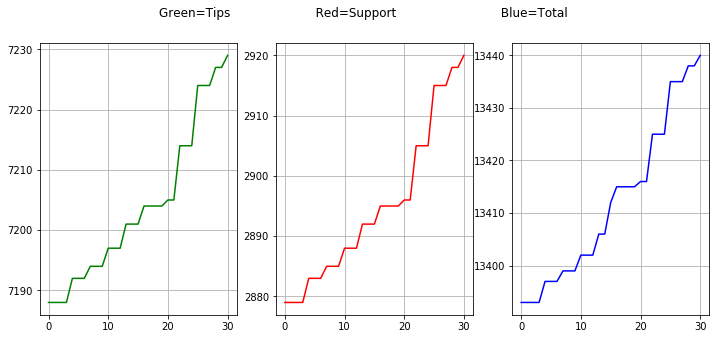

In [10]:
f = open("/home/jack/wallet2.balance").readlines()
x = []
y = []
for line in f:
    if '"supports": "' in line:
        line =line.replace('"\n', '')
        line =line.replace('"supports": "', '')
        line =line.replace('",', '')
        num = float(line)
        x.append(int(num))
        
for lines in f:
    if '"tips": "' in lines:
        lines =lines.replace('"\n', '')
        lines =lines.replace('"tips": "', '')
        lines =lines.replace('",', '')
        nums = float(lines)
        y.append(int(nums))
        
t=range(0,len(x))  
S = np.array(x)
s = np.array(y)
plt.figure(figsize=(12, 5))

plt.subplot(131)
plt.grid(True)
plt.plot(t, s, color='green')

plt.subplot(132)
plt.grid(True)
plt.plot(t, S, color='red')

plt.subplot(133)
plt.grid(True)
plt.plot(t, S+s, color='blue')

plt.suptitle('Green=Tips                      Red=Support                           Blue=Total')
ax.set(xlabel='time (t)', ylabel='Values (LBC)',
       title='Blue=Total / Green=Tips / Red=Support')
plt.show()


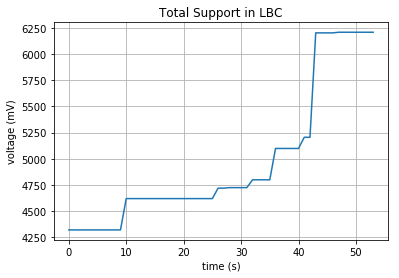

In [46]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
f = open("/home/jack/wallet.balance").readlines()
x = []
for line in f:
    if '"supports": "' in line:
        line =line.replace('"\n', '')
        line =line.replace('"supports": "', '')
        line =line.replace('",', '')
        num = float(line)
        x.append(int(num))

# Data for plotting
t=range(0,len(x))
s = np.array(x)

fig, ax = plt.subplots()
ax.plot(t, s)
ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='Total Support in LBC')
ax.grid()

fig.savefig("test.png")
plt.show()

Green = Supports
Blue = Tips


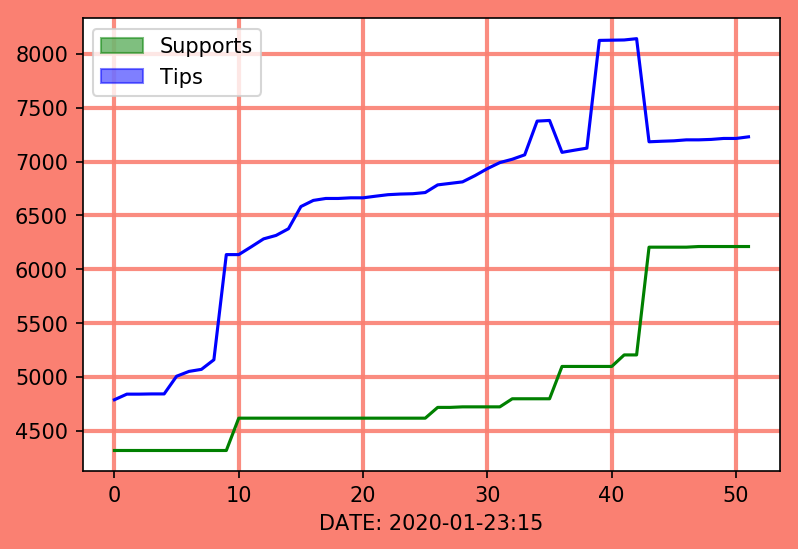

In [40]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline
import matplotlib.patches as mpatches
DT = time.strftime("%Y-%m-%d:%H")
f = open("/home/jack/wallet.balance").readlines()
x = []
y = []
for line in f:
    if '"supports": "' in line:
        line =line.replace('"\n', '')
        line =line.replace('"supports": "', '')
        line =line.replace('",', '')
        num = float(line)
        x.append(int(num))

for lines in f:
    if '"tips": "' in lines:
        lines =lines.replace('"\n', '')
        lines =lines.replace('"tips": "', '')
        lines =lines.replace('",', '')
        nums = float(lines)
        y.append(int(nums))        
        
# Data for plotting
t=range(0,len(x))  
S = np.array(x)
s = np.array(y)

fig, ax = plt.subplots(dpi=150)
ax.grid(color = "salmon", alpha = .9, linewidth = 2)

red_patch = mpatches.Patch(color='green', alpha = .5, label='Supports')
blue_patch = mpatches.Patch(color='blue', alpha = .5, label='Tips')
plt.legend(handles=[red_patch, blue_patch])
ax.set(xlabel='DATE: '+DT)
'''
ax.set(xlabel='DATE: '+DT+'  Samples(Scale = '+NumOfSamples+' samples)   Dropout '+ Dropout, ylabel='Last Training Loss: '+Trainingloss,
       title='Plot Losses from Last '+NumOfSamples+' Samples.   Epoch: '+Epoch+' \n Last: EvaluationLoss: \
'+Evaluationloss+"    LearningRate: "+LearningRate )
'''
print "Green = Supports"
print "Blue = Tips"
fig.patch.set_facecolor('salmon')
#plt.plot(yinc, y, color= 'green', alpha = .5)
#plt.plot(yinc, y, color= 'red', alpha = .5)
plt.plot(t, s, color= 'blue')
plt.plot(t, S, color= 'green')

fig.savefig("test.png")
plt.savefig('test-full.png', bbox_inches="tight", facecolor="salmon")

plt.show()

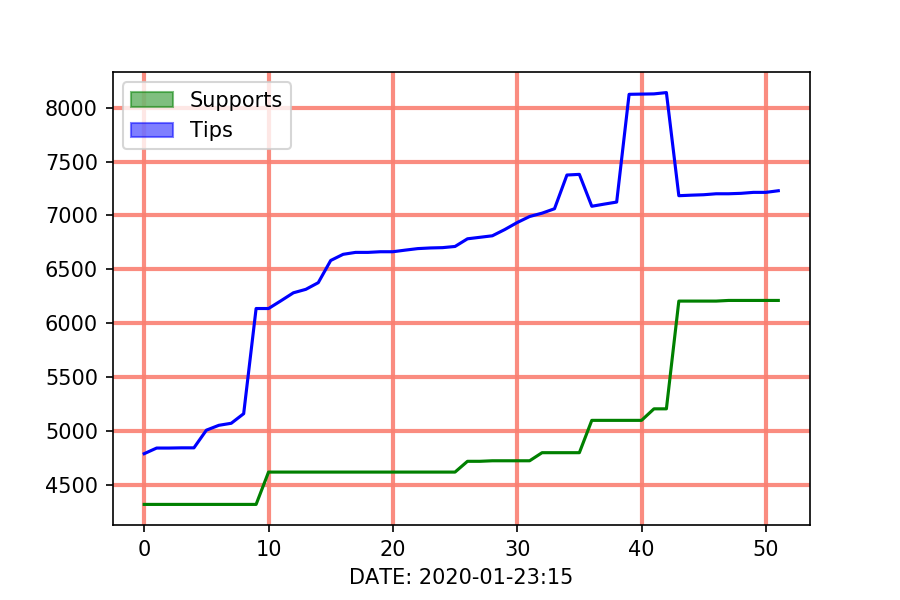

In [41]:
from PIL import Image
IMG = Image.open('test.png')
IMG

(798, 549)


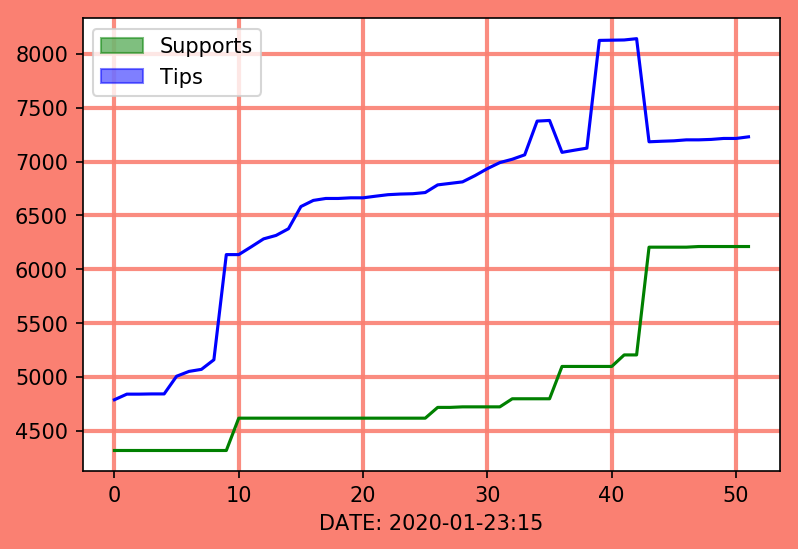

In [42]:
from PIL import Image
IMG = Image.open('test-full.png')
print IMG.size
IMG

## Very little data history > wallet2.balance

Green = Supports
Blue = Tips


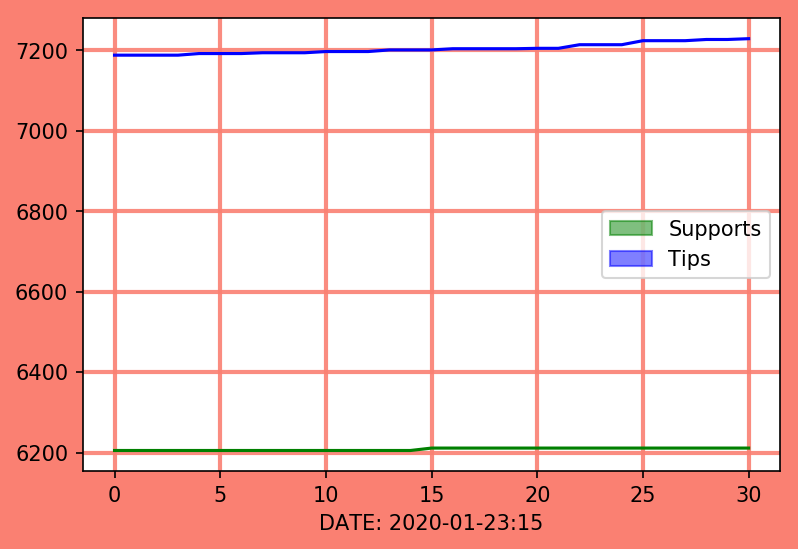

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline
import matplotlib.patches as mpatches
DT = time.strftime("%Y-%m-%d:%H")
f = open("/home/jack/wallet2.balance").readlines()
x = []
y = []
for line in f:
    if '"supports": "' in line:
        line =line.replace('"\n', '')
        line =line.replace('"supports": "', '')
        line =line.replace('",', '')
        num = float(line)
        x.append(int(num))

for lines in f:
    if '"tips": "' in lines:
        lines =lines.replace('"\n', '')
        lines =lines.replace('"tips": "', '')
        lines =lines.replace('",', '')
        nums = float(lines)
        y.append(int(nums))        
        
# Data for plotting
t=range(0,len(x))  
S = np.array(x)
s = np.array(y)

fig, ax = plt.subplots(dpi=150)
ax.grid(color = "salmon", alpha = .9, linewidth = 2)

red_patch = mpatches.Patch(color='green', alpha = .5, label='Supports')
blue_patch = mpatches.Patch(color='blue', alpha = .5, label='Tips')
plt.legend(handles=[red_patch, blue_patch])
ax.set(xlabel='DATE: '+DT)
'''
ax.set(xlabel='DATE: '+DT+'  Samples(Scale = '+NumOfSamples+' samples)   Dropout '+ Dropout, ylabel='Last Training Loss: '+Trainingloss,
       title='Plot Losses from Last '+NumOfSamples+' Samples.   Epoch: '+Epoch+' \n Last: EvaluationLoss: \
'+Evaluationloss+"    LearningRate: "+LearningRate )
'''
print "Green = Supports"
print "Blue = Tips"
fig.patch.set_facecolor('salmon')
#plt.plot(yinc, y, color= 'green', alpha = .5)
#plt.plot(yinc, y, color= 'red', alpha = .5)
plt.plot(t, s, color= 'blue')
plt.plot(t, S, color= 'green')

fig.savefig("test.png")
plt.savefig('test-full.png', bbox_inches="tight", facecolor="salmon")

plt.show()